In [1]:
%matplotlib notebook

In [2]:
#set up dependencies 

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read data file for clinical data (private) 2015 on

flu_data_clinic = ("WHO_NREVSS_Clinical_Labs.csv")

clinic_data_pd = pd.read_csv(flu_data_clinic)

In [4]:
# view/clean the data

#clinic_data_pd.head()


In [5]:
del clinic_data_pd['REGION TYPE']
del clinic_data_pd['REGION']
del clinic_data_pd['PERCENT POSITIVE']
del clinic_data_pd['PERCENT A']
del clinic_data_pd['PERCENT B']
del clinic_data_pd['WEEK']

In [6]:

clinic_data_pd.reset_index(inplace = True)

In [7]:
#read files for public health data 2015 on
flu_data_public = ("WHO_NREVSS_Public_Health_Labs.csv")
public_data_pd = pd.read_csv(flu_data_public)

#public_data_pd.head()

In [8]:
#clean the data
del public_data_pd['REGION TYPE']
del public_data_pd['REGION']


In [9]:
#add columns to establish generalized data
public_data_pd['TOTAL A'] = ''
public_data_pd['TOTAL B'] = ''

In [10]:
public_data_pd['TOTAL A']= public_data_pd['A (2009 H1N1)'] + public_data_pd['H3N2v'] + public_data_pd['A (H3)'] + public_data_pd['A (Subtyping not Performed)']

In [11]:
public_data_pd['TOTAL B']= public_data_pd['B'] + public_data_pd['BVic'] + public_data_pd['BYam']

In [12]:
#public_data_pd.head()

In [13]:
public_data_sub = public_data_pd.rename(columns={'BVic': 'B (Vic)', 'BYam': 'B (Yam)'})
#public_data_sub.head()

In [14]:
#get rid of extraneous info
del public_data_pd['A (2009 H1N1)']
del public_data_pd['A (H3)']
del public_data_pd['A (Subtyping not Performed)']
del public_data_pd['B']
del public_data_pd['BVic']
del public_data_pd['BYam']
del public_data_pd['H3N2v']
del public_data_pd['WEEK']

In [15]:
public_data_pd.reset_index(inplace = True)

In [16]:
#merge dataframes
combined_data_pd = pd.merge(clinic_data_pd, public_data_pd, on='index')


In [17]:
#combined_data_pd.shape

In [18]:
#combined_data_pd.head()

In [19]:
combined_data_pd['TOTAL A']= combined_data_pd['TOTAL A_x'] + combined_data_pd['TOTAL A_y']
combined_data_pd['TOTAL B']= combined_data_pd['TOTAL B_x'] + combined_data_pd['TOTAL B_y']
combined_data_pd['TOTAL SPECIMENS'] = combined_data_pd['TOTAL SPECIMENS_x'] + combined_data_pd['TOTAL SPECIMENS_y']
#combined_data_pd.head()

In [20]:
del combined_data_pd['TOTAL A_x']
del combined_data_pd['TOTAL A_y']
del combined_data_pd['TOTAL B_x']
del combined_data_pd['TOTAL B_y']
del combined_data_pd['TOTAL SPECIMENS_x']
del combined_data_pd['TOTAL SPECIMENS_y']
del combined_data_pd['YEAR_y']



In [21]:
#combined_data_pd.head()

In [22]:
combined_data_pd = combined_data_pd.rename(columns={'YEAR_x':'YEAR'})
#combined_data_pd.head()

In [23]:
combined_data_org = combined_data_pd[['index','YEAR','TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B']]
#combined_data_org.head()

In [24]:
flu_data_comb_pre2015 = ("WHO_NREVSS_Combined_prior_to_2015_16.csv")
combined_data_pre2015 = pd.read_csv(flu_data_comb_pre2015)

In [25]:
#prepare the pre-2015 data set
#combined_data_pre2015.head()

In [26]:
del combined_data_pre2015['REGION TYPE']
del combined_data_pre2015['REGION']
del combined_data_pre2015['PERCENT POSITIVE']


In [27]:
combined_data_pre2015['TOTAL A']= ''


In [28]:
#re-combining the subtypes for a totals df, keeping them separated in another
combined_data_pre2015['TOTAL A']= combined_data_pre2015['A (2009 H1N1)'] + combined_data_pre2015['A (H1)'] + combined_data_pre2015['A (H3)'] +combined_data_pre2015['A (Subtyping not Performed)'] + combined_data_pre2015['A (Unable to Subtype)'] + combined_data_pre2015['H3N2v']
combined_data_pre2015_sub = combined_data_pre2015.rename(columns={'B':'TOTAL B'})


In [29]:
del combined_data_pre2015['A (2009 H1N1)']
del combined_data_pre2015['A (H1)']
del combined_data_pre2015['A (H3)']
del combined_data_pre2015['A (Subtyping not Performed)']
del combined_data_pre2015['A (Unable to Subtype)']
del combined_data_pre2015['H3N2v']
del combined_data_pre2015['WEEK']

In [30]:
combined_data_pre2015.reset_index(inplace = True)

In [31]:
combined_data_pre2015 = combined_data_pre2015.rename(columns={'B':'TOTAL B'})
combined_data_pre2015_org = combined_data_pre2015[['index','YEAR','TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B']]
#len(combined_data_pre2015_org)

In [32]:
#combining the prepared data into one set from 2012-2018
combined_data_allyrs = combined_data_pre2015_org.append(combined_data_org)

#combined_data_allyrs.tail()

In [33]:
grouped_combined_data_allyrs = combined_data_allyrs.groupby(['YEAR'])
#grouped_combined_data_allyrs.count().head(7)

In [34]:
#manipualting the groupby object
specimens_sum = grouped_combined_data_allyrs['TOTAL SPECIMENS'].sum()
total_a_sum = grouped_combined_data_allyrs['TOTAL A'].sum()
total_b_sum = grouped_combined_data_allyrs['TOTAL B'].sum()


In [35]:
allyrs_grouped_df = pd.DataFrame({'TOTAL SPECIMENS': specimens_sum, 'TOTAL A': total_a_sum, 'TOTAL B': total_b_sum})

In [36]:
allyrs_grouped_df.head(7)

,TOTAL SPECIMENS,TOTAL A,TOTAL B
YEAR,,,
2012,117135,22090,5857
2013,387851,50306,18391
2014,575223,92665,11228
2015,746081,51621,20311
2016,953444,81495,33267
2017,1279464,155962,56468
2018,1108151,148474,81583


In [37]:
per_type_a = round((allyrs_grouped_df['TOTAL A']/allyrs_grouped_df['TOTAL SPECIMENS'])*100,2)
per_type_b = round((allyrs_grouped_df['TOTAL B']/allyrs_grouped_df['TOTAL SPECIMENS'])*100,2)
per_pos = round(((allyrs_grouped_df['TOTAL A']+allyrs_grouped_df['TOTAL B'])/allyrs_grouped_df['TOTAL SPECIMENS'])*100,2)


In [38]:
allyrs_grouped_df['% TYPE A']=per_type_a
allyrs_grouped_df['% TYPE B']=per_type_b
allyrs_grouped_df['% TESTED POSITIVE']=per_pos

In [39]:
allyrs_grouped_df.head(7)

,TOTAL SPECIMENS,TOTAL A,TOTAL B,% TYPE A,% TYPE B,% TESTED POSITIVE
YEAR,,,,,,
2012,117135,22090,5857,18.86,5.00,23.86
2013,387851,50306,18391,12.97,4.74,17.71
2014,575223,92665,11228,16.11,1.95,18.06
2015,746081,51621,20311,6.92,2.72,9.64
2016,953444,81495,33267,8.55,3.49,12.04
2017,1279464,155962,56468,12.19,4.41,16.60
2018,1108151,148474,81583,13.40,7.36,20.76


In [40]:
years = [2012,2013,2014,2015,2016,2017,2018]
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018]

<IPython.core.display.Javascript object>


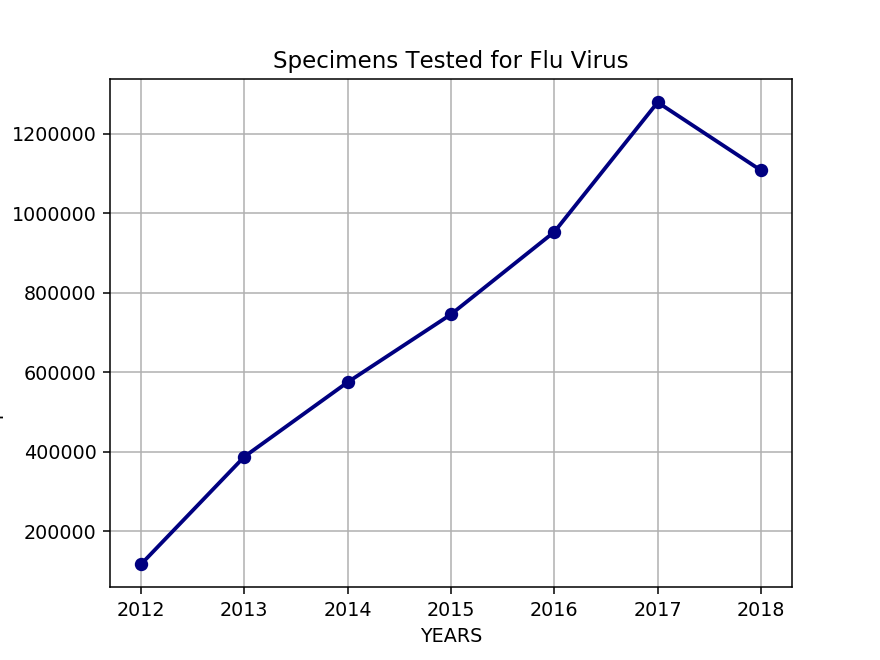

In [41]:
#plot to describe flu testing rates

freq_test = plt.plot(years, specimens_sum, marker = 'o', color = "navy", lw = 2.0, label = "Specimens Tested" )
plt.ylabel('# of Specimens Tested for Flu')
plt.xlabel('YEARS')
plt.title('Specimens Tested for Flu Virus')
plt.grid(True)

plt.savefig("Images/SpecimensTested.png")
plt.show()

<IPython.core.display.Javascript object>


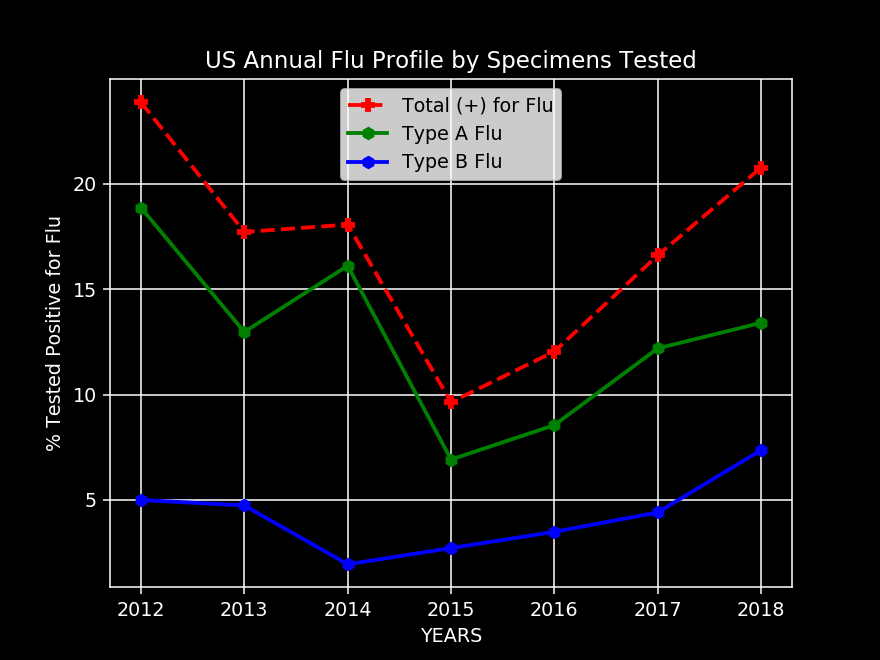

In [43]:
 
with plt.style.context(('dark_background')):
    pos_flu, = plt.plot(years, per_pos, marker = 'P', color="red", lw = 2.0,ls = "--", label="Total (+) for Flu" )
    type_a, = plt.plot(years, per_type_a, marker = 'h',color="green",linewidth = 2.0, label="Type A Flu")
    type_b, = plt.plot(years, per_type_b, marker = 'h', color="blue",linewidth = 2.0, label="Type B Flu")
plt.legend(loc="best")
plt.ylabel('% Tested Positive for Flu')
plt.xlabel('YEARS')
plt.title('US Annual Flu Profile by Specimens Tested')
plt.grid(True)
plt.savefig("Images/USFluProfile.png")
 #Show the chart
plt.show()

In [44]:
#public_data_sub.head()

In [44]:
#stacked plt
#labels = ["Total Percent Positive", "Type A", "Type B"]
#fig, ax = plt.subplots()
#ax.stackplot(years, per_pos,per_type_a, per_type_b, labels=labels)

In [45]:
public_data_sub_group = public_data_sub.groupby(['YEAR'])
H1N1_sum = public_data_sub_group['A (2009 H1N1)'].sum()
A_H3_sum = public_data_sub_group['A (H3)'].sum()
A_no_sub_sum = public_data_sub_group['A (Subtyping not Performed)'].sum()
H3N2v_sum = public_data_sub_group['H3N2v'].sum()
Atype_sum = H1N1_sum + A_H3_sum + A_no_sub_sum + H3N2v_sum 

B_sum = public_data_sub_group['B'].sum()
BVic_sum = public_data_sub_group['B (Vic)'].sum()
BYam_sum = public_data_sub_group['B (Yam)'].sum()

Atype_flu_profile = pd.DataFrame({"A Type Total":Atype_sum, "H1N1":H1N1_sum, "H3": A_H3_sum,"A (not typed)":A_no_sub_sum, "H3N2v": H3N2v_sum})

In [46]:
Atype_flu_profile.reset_index(inplace=True)
#Atype_flu_profile

In [47]:
pers_H1N1 = round((Atype_flu_profile['H1N1']/Atype_flu_profile['A Type Total'])*100,2)
pers_H3 = round(((Atype_flu_profile['H3']+Atype_flu_profile['H3N2v'])/Atype_flu_profile['A Type Total'])*100,2)
pers_nt = round((Atype_flu_profile['A (not typed)']/Atype_flu_profile['A Type Total'])*100,2)

years_sub = Atype_flu_profile['YEAR']

In [49]:

#AH3_plot, = plt.plot(years_sub, pers_H3, marker = 'd', color = "fuchsia", lw=2.0, label="A-H3N2")
#H1N1_plot, = plt.plot(years_sub, pers_H1N1, marker = 'd', color = "yellowgreen", lw=2.0, label="A-H1N1")
#
##A_no_sub_plot, = plt.plot(years_sub, pers_nt, marker = 'd', color = "goldenrod", lw=2.0, label="A (not typed)")
#
#
#plt.grid(True)
#plt.legend(loc="best")
#plt.ylabel('% Influenza Type A by Strain')
#plt.xlabel('YEARS')
#plt.title('US Type A Inflenza Virus H1 / H3 Prevalence')
#
#plt.show()